# Linear Regression Exercise `Python`

This exercise is going to be a little different in the sense that we won't be guiding in a question-by-question format. Instead, we are going to let you construct a linear model in your choice of `R` or `Python`, whichever you prefer.

The prediction problem is to predict `height` from the `'/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv'` dataset. You can use any variable or combination of variables in order to predict `height`.

You are not going to be graded upon the performance of the model itself, but please approach this as an actual prediction problem. That being said, you should split the data into training and testing sets, in which your model is trained on your training set while the performance is assessed on the testing set. Be sure to predict some output with your testing inputs.

The purpose of this assignment is to demonstrate your ability to use regression to develop a machine learning model. Feel free to include anything that demonstrates your understanding of model development and model refinement including data exploration and even a written description of your reasoning. 

Like always, feel free to ask questions along the way if you get stuck at any point. We are more than happy to help!

To add execution cells, click in this cell.
Then, in the notebook menu: `Insert > Insert Cell Below`

In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import scipy
import matplotlib
import seaborn as sns

with open('/dsa/data/all_datasets/stature-hand-foot/stature-hand-foot.csv') as file:
        d = pd.read_csv(file)
        df = pd.DataFrame(d)

type(df)

list(df.columns.values)

['gender', 'height', 'hand length', ' foot length']

In [20]:
df.head()

,gender,height,hand length,foot length
0,1,1760.2,208.6,269.6
1,1,1730.1,207.6,251.3
2,1,1659.6,173.2,193.6
3,1,1751.3,258.0,223.8
4,1,1780.6,212.3,282.1


                gender    height  hand length   foot length
gender        1.000000 -0.805948    -0.721430     -0.751605
height       -0.805948  1.000000     0.873295      0.881280
hand length  -0.721430  0.873295     1.000000      0.788224
 foot length -0.751605  0.881280     0.788224      1.000000
relationships between all variables seem high, so I will use foot length, hand length, and gender in my model


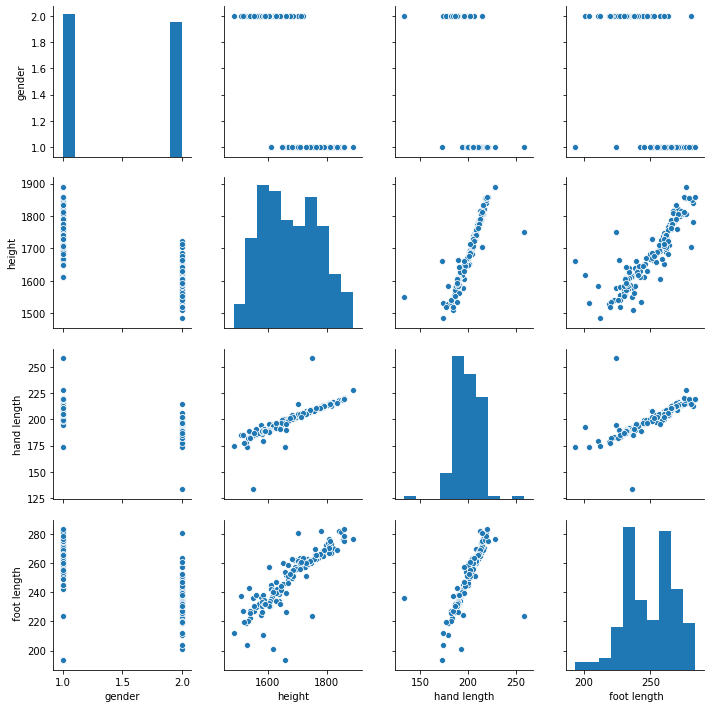

In [21]:
print(df.corr())
print('relationships between all variables seem significant, so I will use foot length, hand length, and gender in my model')
sns.pairplot(df)

In [22]:
train = df.sample(frac=7/10, random_state = 1)
test = df.drop(train.index)
train
test

,gender,height,hand length,foot length
1,1,1730.1,207.6,251.3
3,1,1751.3,258.0,223.8
7,1,1664.0,200.0,252.1
8,1,1808.7,214.5,274.7
13,1,1840.3,218.3,282.1
20,1,1806.6,215.6,276.3
21,1,1788.9,211.2,266.6
22,1,1668.3,199.4,249.4
24,1,1786.9,211.8,268.1
25,1,1771.0,210.4,265.7


In [23]:
train_X = np.asarray(train[['gender', 'hand length', ' foot length']])
train_y = np.asarray(train.height)

test_X = np.asarray(test[['gender', 'hand length', ' foot length']])
test_y = np.asarray(test.height)

In [25]:
regr = linear_model.LinearRegression()

In [30]:
regr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
regr.intercept_

714.8945738470037

In [11]:
print('Coefficients: \n', regr.coef_)
print

Coefficients: 
 [-44.19682735   3.38653187   1.4188518 ]


<function print>

In [12]:
print('R-Squared: {}'.format(regr.score(train_X, train_y)))

R-Squared: 0.8623523993502923


In [13]:
print('R-Squared: {}'.format(regr.score(test_X, test_y))) 
print("high R value implies the model is pretty useful, variation in y is .89% caused by variation in hand length foot length and gender")

R-Squared: 0.8920066395220825
high R value implies the model is pretty useful, variation in y is .89% caused by variation in hand length foot length and gender


In [14]:
heightpred = regr.predict(test_X)
df2 = pd.DataFrame({'predicted height' : heightpred, 'actual height': test_y})
df2

,predicted height,actual height
0,1730.299221,1730.1
1,1861.962003,1751.3
2,1705.696660,1664.0
3,1786.867423,1808.7
4,1810.235747,1840.3
5,1792.862771,1806.6
6,1764.199168,1788.9
7,1699.833841,1668.3
8,1768.359365,1786.9
9,1760.212976,1771.0


'visualzation of actual vs predicted height values'

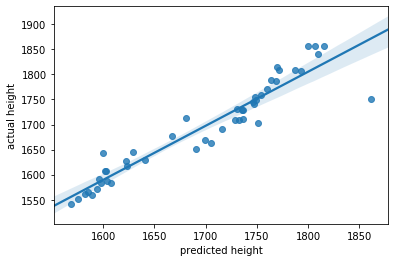

In [15]:
sns.regplot(x = 'predicted height', y = 'actual height', data = df2);
"visualzation of actual vs predicted height values to show effectiveness of model"


# Save your notebook, then `File > Close and Halt`